In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

series.index = series.index.to_period('M')

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<ipython-input-1-db40cd89687e>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Python\Python38\lib\site-packages\pandas\io\parsers.py:3339: FutureWarning: 
        Use pd.to_datetime instead.

  return generic_parser(date_parser, *date_cols)


ValueError: time data '1901' does not match format '%Y-%m'

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sms
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
series = pd.read_csv('sales.csv', parse_dates=['year1'], index_col = 'year1')
series

,Unnamed: 0,year,サンミラー,ダイアラスター 包材
year1,,,,
2015-03-01,1,NaN,0.0,0.0
2015-04-01,2,NaN,929680.0,402260.0
2015-05-01,3,NaN,937160.0,450960.0
2015-06-01,4,NaN,1030000.0,365040.0
2015-07-01,5,NaN,1326950.0,234380.0
...,...,...,...,...
2022-08-01,90,NaN,1395440.0,949200.0
2022-09-01,91,NaN,1108600.0,972320.0
2022-10-01,92,NaN,905520.0,868640.0


In [ ]:
series.drop(['Unnamed: 0', 'year'], axis=1, inplace = True)

In [ ]:
series

,サンミラー,ダイアラスター 包材
year1,,
2015-03-01,0.0,0.0
2015-04-01,929680.0,402260.0
2015-05-01,937160.0,450960.0
2015-06-01,1030000.0,365040.0
2015-07-01,1326950.0,234380.0
...,...,...
2022-08-01,1395440.0,949200.0
2022-09-01,1108600.0,972320.0
2022-10-01,905520.0,868640.0


In [ ]:
series.dtypes

サンミラー         float64
ダイアラスター　包材    float64
dtype: object

In [ ]:
series.isnull().sum()

サンミラー         0
ダイアラスター　包材    0
dtype: int64

<AxesSubplot:xlabel='year1'>

C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12480 missing from current font.
  font.set_text(s, 0.0,

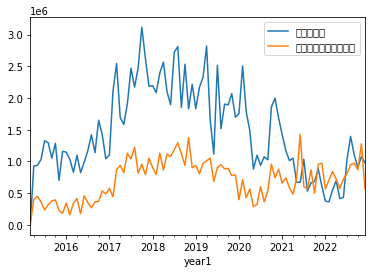

In [ ]:
series.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(series['サンミラー'])

ADF Statistics: -1.5845539811890044
p- value: 0.49134776014405857
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
## Use Techniques Differencing
series['Passengers First Difference']=series['サンミラー']-series['サンミラー'].shift(1)

In [ ]:

adf_test(series['Passengers First Difference'].dropna())

ADF Statistics: -8.44686436987705
p- value: 1.703515277229147e-13
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='year1'>

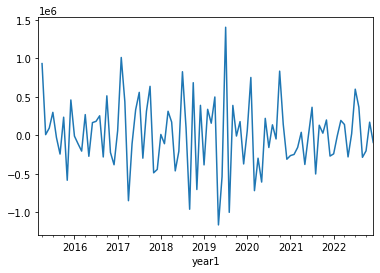

In [ ]:
series['Passengers First Difference'].plot()    ###  " サンミラー " became stationary after first differencing...///

                                                ###  As we have "first differencing" so,   d  =  1

In [ ]:
### 12 months
## Use Techniques Differencing
series['Passengers 12 Difference']=series['サンミラー']-series['サンミラー'].shift(12)

In [ ]:
adf_test(series['Passengers 12 Difference'].dropna())

ADF Statistics: -2.054164083360576
p- value: 0.2633401185407329
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

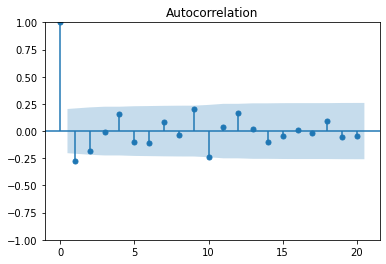

In [ ]:
acf = plot_acf(series["Passengers First Difference"].dropna())

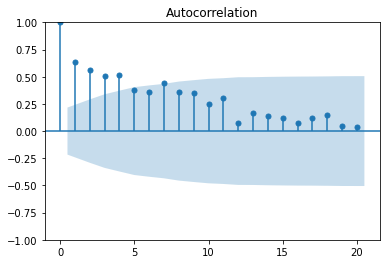

In [ ]:
acf12 = plot_acf(series["Passengers 12 Difference"].dropna())

In [ ]:
# series['year1'] = pd.to_datetime(series['year1'])
# series.info()

# series.set_index('year1', inplace=True)
# series.info()

In [ ]:
# series = pd.read_csv('sales.csv', parse_dates=['year1']) # header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# series

In [ ]:
# %matplotlib inline
# series.loc[:, 'サンミラー'].resample('W').plot()

In [ ]:
# import matplotlib.pyplot as plt

# WQ=series['サンミラー'].cumsum()
# fig = plt.figure(figsize=(15, 10))
# WQ.plot(y = 'サンミラー')
# print('Spending graph cumulated')

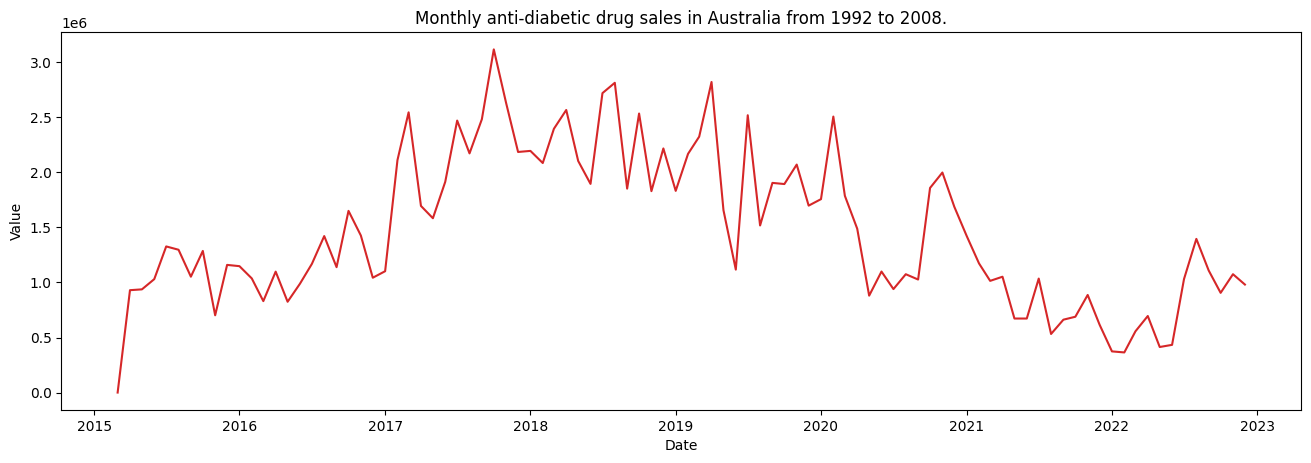

In [ ]:
# Draw Plot
def plot_df(series, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(series, x=series.index, y=series['サンミラー'], title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

In [ ]:
#  Since all values are positive, you can show this on both sides of the Y axis to emphasize the growth.

# x = series.index.values
# y1 = series['サンミラー'].values

# # Plot
# fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
# plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
# plt.ylim(-800, 800)
# plt.title('Air Passengers (Two Side View)', fontsize=16)
# plt.hlines(y=0, xmin=np.min(series['サンミラー']), xmax=np.max(series['サンミラー']), linewidth=.5)
# plt.show()

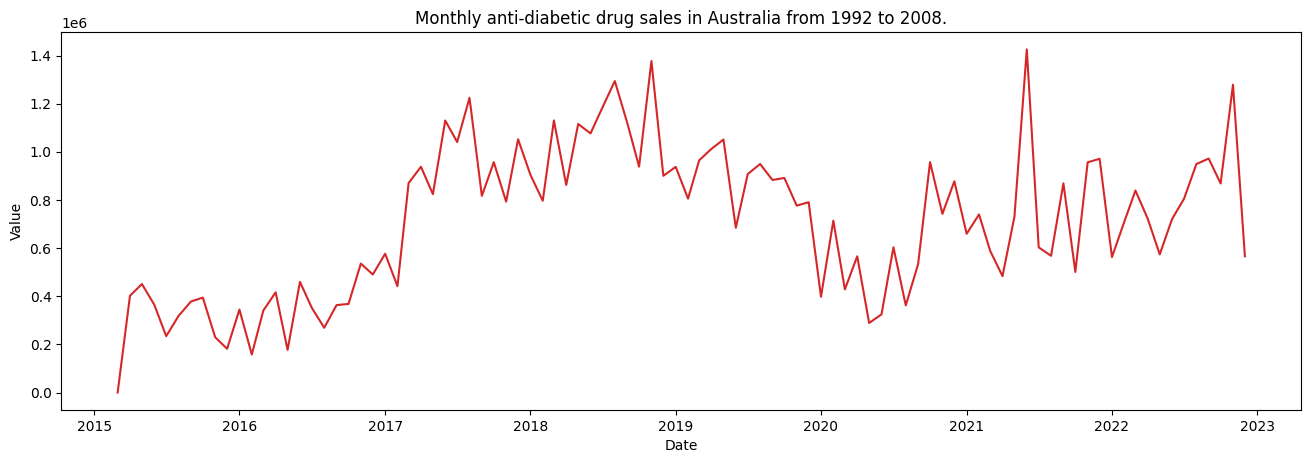

In [ ]:
# Draw Plot
def plot_df(series, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(series, x=series.index, y=series['ダイアラスター　包材'], title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

In [ ]:
# Prepare data
# series['year'] = [d.year for d in series.date]
# series['month'] = [d.strftime('%b') for d in series.date]
# years = df['year'].unique()

# # Prep Colors
# np.random.seed(100)
# mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# # Draw Plot
# plt.figure(figsize=(16,12), dpi= 80)
# for i, y in enumerate(years):
#     if i > 0:
#         plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
#         plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
# plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
# plt.show()

<AxesSubplot:title={'center':'Trend and Seasonality'}, xlabel='year1'>

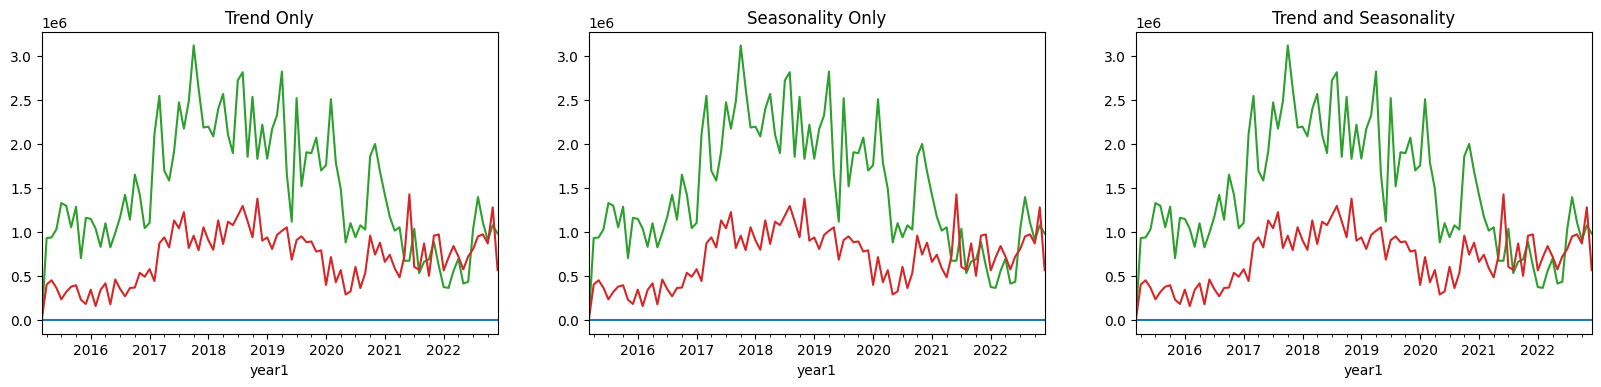

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('sales.csv', parse_dates=['year1'], index_col='year1').plot(title='Trend Only', legend=False, ax=axes[0])
pd.read_csv('sales.csv', parse_dates=['year1'], index_col='year1').plot(title='Seasonality Only', legend=False, ax=axes[1])
pd.read_csv('sales.csv', parse_dates=['year1'], index_col='year1').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# from dateutil.parser import parse

# # Import Data
# df = pd.read_csv('sales.csv', parse_dates=['year1'], index_col='year1')

# # Multiplicative Decomposition
# # result_mul = seasonal_decompose(df['サンミラー'], model='multiplicative', extrapolate_trend='freq')

# # Additive Decomposition
# result_add = seasonal_decompose(df['サンミラー'], model='additive', extrapolate_trend='freq')

# # Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
# # result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
# result_add.plot().suptitle('Additive Decompose', fontsize=22)
# plt.show()

# ARIMA Forcasting

In [ ]:
# import numpy as np, pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# # Import data
# df = pd.read_csv('sales.csv', names=['サンミラー'], header=0)

# # Original Series
# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(df['サンミラー']); axes[0, 0].set_title('Original Series')
# plot_acf(df['サンミラー'], ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(df['サンミラー'].diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(df['サンミラー'].diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df['サンミラー'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df['サンミラー'].diff().diff().dropna(), ax=axes[2, 1])

# plt.show()

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12511 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12469 missing from current font.
  font.set_text(s, 0, f

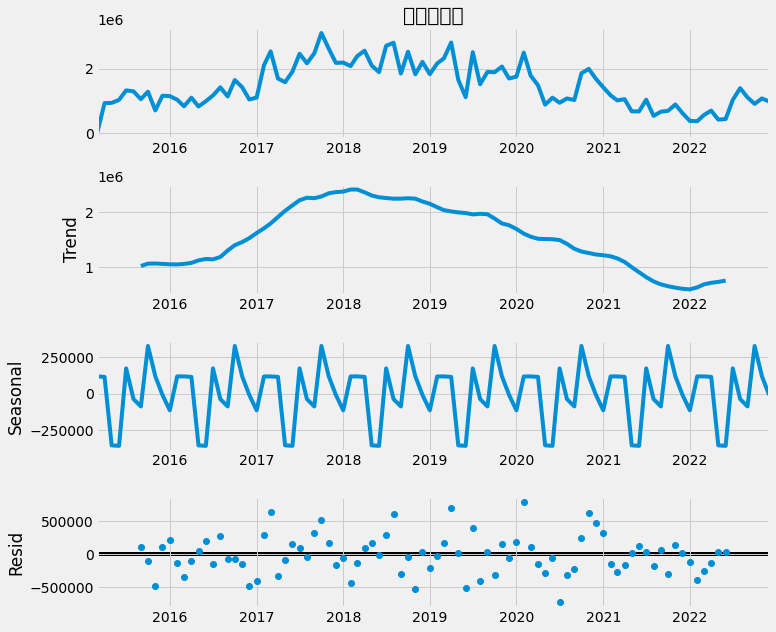

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(series['サンミラー'], model='additive')
fig = decomposition.plot()
plt.show()

C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0,

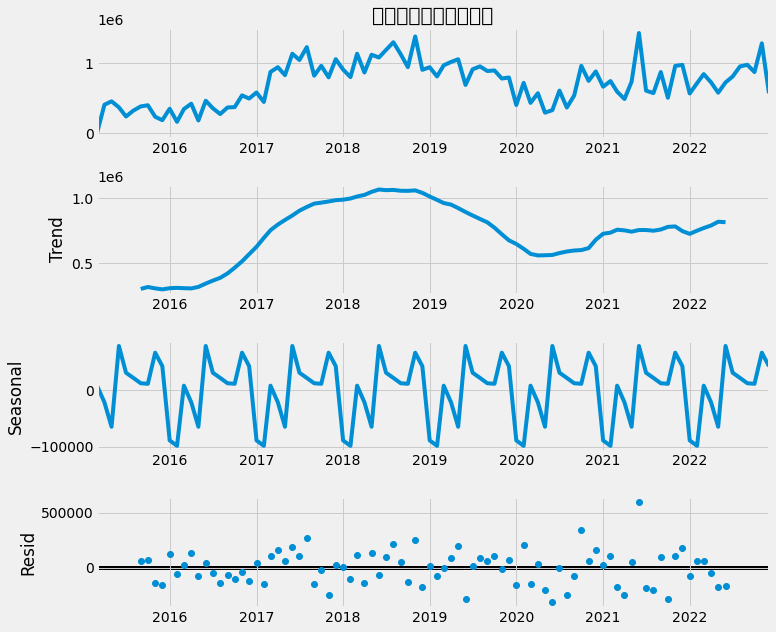

In [ ]:
decomposition = sm.tsa.seasonal_decompose(series['ダイアラスター　包材'], model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series['サンミラー'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2926.3798205196254
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2504.0838086463796
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2413.3416271676865
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2060.2557837921245
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2440.3124783787916
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2425.613244104855
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2093.5160419612507
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2062.6202773967216
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2838.7544375053612
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2461.8984005530974
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2363.361508058439
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2012.0237775792184
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2512.5946074469766
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2453.5918101397638
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2072.4679308824607
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2009.3496809866006
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2653.5459813118587
SARIMAX(0, 1, 0)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(series['サンミラー'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                               # enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3422      0.226      1.512      0.130      -0.101       0.786
ma.L1         -0.7649      0.164     -4.654      0.000      -1.087      -0.443
ar.S.L12      -0.4990      0.143     -3.485      0.000      -0.780      -0.218
sigma2      2.783e+11   3.47e-13   8.01e+23      0.000    2.78e+11    2.78e+11


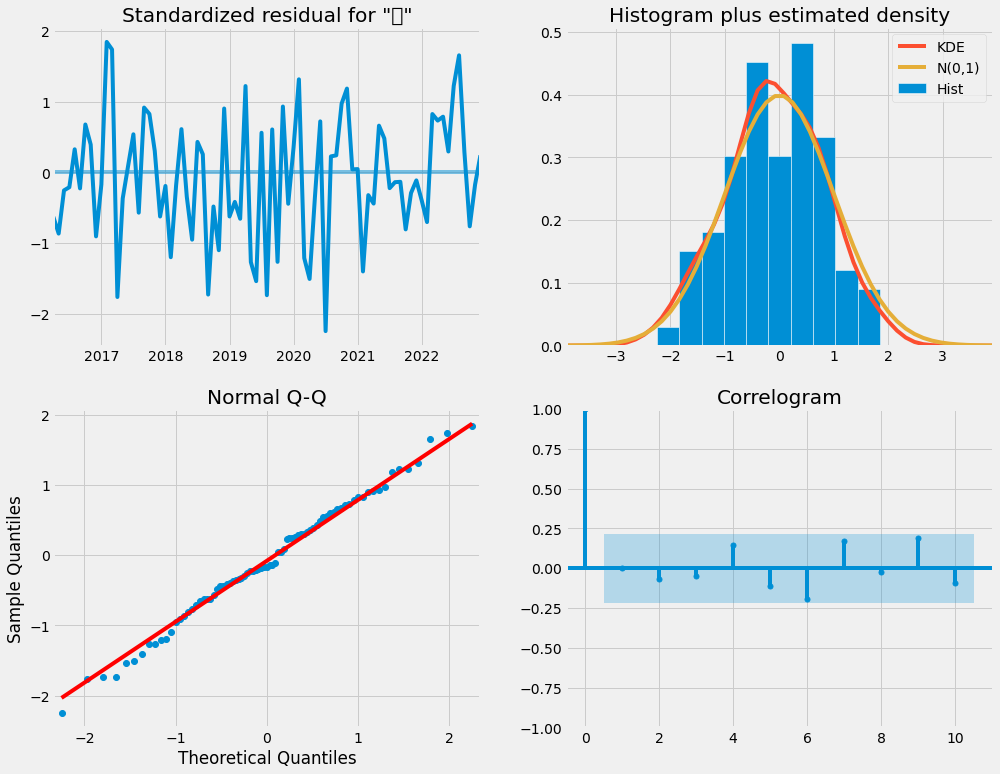

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
prediction = results.get_prediction(start = pd.to_datetime('2022-12-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower サンミラー,upper サンミラー
2022-12-01,-179921.333422,1.887961e+06


In [ ]:
prediction = results.get_prediction(start = pd.to_datetime('2023-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower サンミラー,upper サンミラー
2023-01-01,-335582.062683,1.732301e+06


In [ ]:
pred = results.predict('2022','2030',dynamic=True)
pred

2022-01-01    5.830963e+05
2022-02-01    8.563842e+05
2022-03-01    4.261966e+05
2022-04-01    2.988827e+05
2022-05-01   -1.937066e+05
                  ...     
2029-09-01   -4.603998e+06
2029-10-01   -4.310361e+06
2029-11-01   -4.131714e+06
2029-12-01   -4.416004e+06
2030-01-01   -4.525356e+06
Freq: MS, Name: predicted_mean, Length: 97, dtype: float64

In [ ]:


pred = results.get_prediction(start=pd.to_datetime('2015'), dynamic=False)
pred_ci = pred.conf_int()




ModuleNotFoundError: No module named 'pandas_datareader'

AttributeError: 'Series' object has no attribute 'predicted_mean'

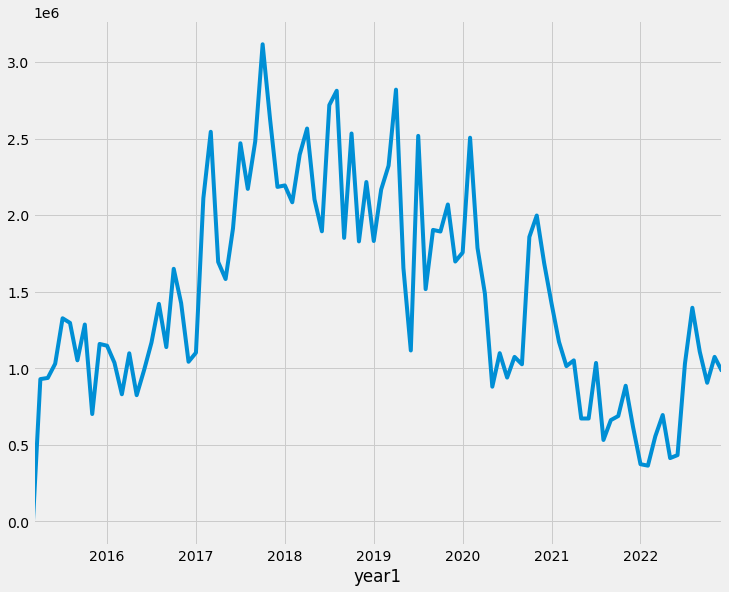

In [ ]:
ax = series['サンミラー']['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('SURVEY YEAR')
ax.set_ylabel('Adjusted and normalized foreigners')
plt.legend()

plt.show()

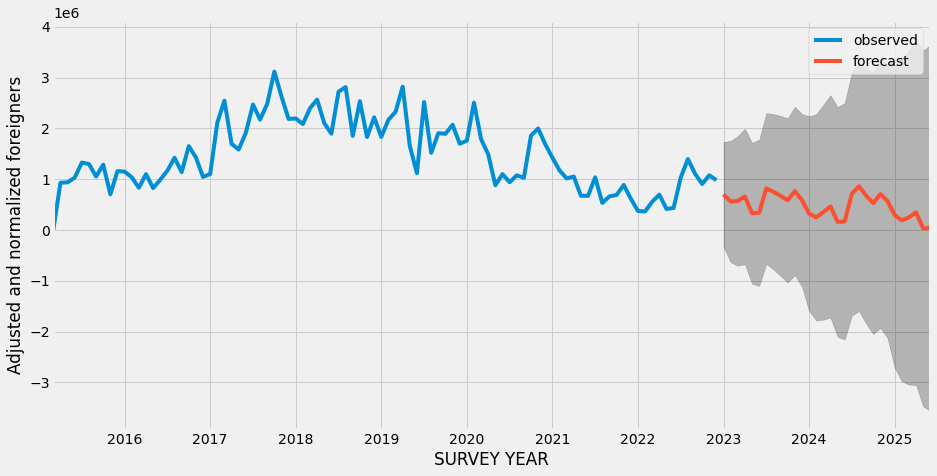

In [ ]:
# forcasting for out of sample data
pred_uc = results.get_forecast(steps = 30)
pred_ci = pred_uc.conf_int()

ax = series['サンミラー'].plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('SURVEY YEAR')
ax.set_ylabel('Adjusted and normalized foreigners')

plt.legend()
plt.show()

In [ ]:
series

,サンミラー,ダイアラスター 包材,Passengers First Difference,Passengers 12 Difference
year1,,,,
2015-03-01,0.0,0.0,NaN,NaN
2015-04-01,929680.0,402260.0,929680.0,NaN
2015-05-01,937160.0,450960.0,7480.0,NaN
2015-06-01,1030000.0,365040.0,92840.0,NaN
2015-07-01,1326950.0,234380.0,296950.0,NaN
...,...,...,...,...
2022-08-01,1395440.0,949200.0,364560.0,863440.0
2022-09-01,1108600.0,972320.0,-286840.0,446760.0
2022-10-01,905520.0,868640.0,-203080.0,217040.0


In [ ]:
series.rename({'Passengers First Difference' : 'First_Diff', "Passengers 12 Difference":"Seasonal_Diff"}, axis=1,inplace=True)

In [ ]:
series

,サンミラー,ダイアラスター 包材,First_Diff,Seasonal_Diff
year1,,,,
2015-03-01,0.0,0.0,NaN,NaN
2015-04-01,929680.0,402260.0,929680.0,NaN
2015-05-01,937160.0,450960.0,7480.0,NaN
2015-06-01,1030000.0,365040.0,92840.0,NaN
2015-07-01,1326950.0,234380.0,296950.0,NaN
...,...,...,...,...
2022-08-01,1395440.0,949200.0,364560.0,863440.0
2022-09-01,1108600.0,972320.0,-286840.0,446760.0
2022-10-01,905520.0,868640.0,-203080.0,217040.0
